[View in Colaboratory](https://colab.research.google.com/github/Manasa9391/Cognitive-Computing/blob/master/CNN_CIFAR10.ipynb)

Choose different   optimizers (SGD, Adam, RMSprop etc. and compare and contrast the optimizers)
Which one would you recommend and why?

The base code had an optimizer of RMSprop and the model is 59.7 percent accurate on testing. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os


batch_size = 1024
num_classes = 10
epochs = 70
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'



# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

def save_history(history, result_file):
    loss = history.history['loss']
    acc = history.history['acc']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_acc']
    nb_epoch = len(acc)

    with open(result_file, "w") as fp:
        fp.write("epoch\tloss\tacc\tval_loss\tval_acc\n")
        for i in range(nb_epoch):
            fp.write("%d\t%f\t%f\t%f\t%f\n" %
                     (i, loss[i], acc[i], val_loss[i], val_acc[i]))
            
            
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

        

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)
    # Fit the model on the batches generated by datagen.flow().
    history =model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    save_history(history, 'history.txt')

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
scores_t = model.evaluate(x_train, y_train, verbose=1)
print('Train loss:', scores_t[0])
print('Train accuracy:', scores_t[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/70
49/49 [==============================] - 35s 718ms/step - loss: 2.2154 - acc: 0.1702 - val_loss: 2.0574 - val_acc: 0.2903
Epoch 2/70
49/49 [==============================] - 33s 682ms/step - loss: 2.0287 - acc: 0.2559 - val_loss: 1.9192 - val_acc: 0.3308
Epoch 3/70
49/49 [==============================] - 34s 690ms/step - loss: 1.9330 - acc: 0.2963 - val_loss: 1.8408 - val_acc: 0.3544
Epoch 4/70
49/49 [==============================] - 34s 688ms/step - loss: 1.8646 - acc: 0.3248 - val_loss: 1.7602 - val_acc: 0.3770
Epoch 5/70
49/49 [==============================] - 34s 688ms/step - loss: 1.8168 - acc: 0.3432 - val_loss: 1.7083 - val_acc: 0.3924
Epoch 6/70
49/49 [==============================] - 34s 686ms/step - loss: 1.7786 - acc: 0.3576 - val_loss: 1.6912 - val_acc: 0.3948
Epoch 7/70
49/49 [==============================] - 33s 679ms/step - loss: 1.7496 - acc: 0.368

In [13]:

def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(32*32*3).reshape((1,32*32*3))
    c[0] = img
    return c
  
right = 0
mistake = 0
import random
for i in range(100):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    #print(index)
    data = convertCIFER10Data(image)

  
    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n
    i = np.array(list(y_test[index]).index(1))
    if i == bestclass:
        #print(i)
        #plt.title(cifar10_labels[bestclass])
        right += 1
    else:
        #plt.title(cifar10_labels[bestclass] + "!=" + cifar10_labels[y_test[index][0]], color='#ff0000')
        mistake += 1
print("The number of correct answers:", right)
print("The number of mistake:", mistake)

ValueError: ignored

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(history.history['acc'])+1),history.history['acc'])
    axs[0].plot(range(1,len(history.history['val_acc'])+1),history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(history.history['acc'])+1),len(history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(history.history['loss'])+1),history.history['loss'])
    axs[1].plot(range(1,len(history.history['val_loss'])+1),history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(history.history['loss'])+1),len(history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

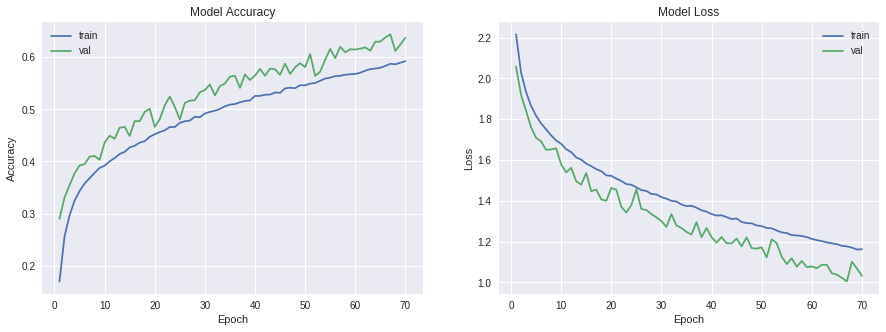

In [26]:
plot_model_history(model)

In [0]:
#model.save("C:\\Users\\Manasa\\Desktop\\Srikanth Assignment\\cifar.h5")

model.save('model.h5')

from google.colab import files
files.download("model.h5")

In [0]:



from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = model.to_json()


with open("model_num.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model_num.h5")

In [61]:
# load json and create model
json_file = open('model_num.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model_num.h5")
print("Loaded model from disk")

model.save('model_num.hdf5')
loaded_model=load_model('model_num.hdf5')

Loaded model from disk


In [0]:
# Changing the Optimizer to Adam

In [28]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 1024
num_classes = 10
epochs = 70
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model_a = Sequential()
model_a.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_a.add(Activation('relu'))
model_a.add(Conv2D(32, (3, 3)))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))
model_a.add(Dropout(0.25))

model_a.add(Conv2D(64, (3, 3), padding='same'))
model_a.add(Activation('relu'))
model_a.add(Conv2D(64, (3, 3)))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))
model_a.add(Dropout(0.25))

model_a.add(Flatten())
model_a.add(Dense(512))
model_a.add(Activation('relu'))
model_a.add(Dropout(0.5))
model_a.add(Dense(num_classes))
model_a.add(Activation('softmax'))

# initiate RMSprop optimizer
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
opt = keras.optimizers.adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Let's train the model using RMSprop
model_a.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model_a.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history=model_a.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    save_history(history, 'history.txt')

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model_a.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model_a.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
scores_train = model_a.evaluate(x_train, y_train, verbose=1)
print('Train loss:', scores_train[0])
print('Train accuracy:', scores_train[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/70
49/49 [==============================] - 36s 729ms/step - loss: 1.9740 - acc: 0.2723 - val_loss: 1.6649 - val_acc: 0.4032
Epoch 2/70
49/49 [==============================] - 35s 707ms/step - loss: 1.6368 - acc: 0.3982 - val_loss: 1.4288 - val_acc: 0.4759
Epoch 3/70
49/49 [==============================] - 35s 711ms/step - loss: 1.5030 - acc: 0.4527 - val_loss: 1.3758 - val_acc: 0.4938
Epoch 4/70
49/49 [==============================] - 35s 709ms/step - loss: 1.4350 - acc: 0.4798 - val_loss: 1.2709 - val_acc: 0.5407
Epoch 5/70
49/49 [==============================] - 35s 711ms/step - loss: 1.3568 - acc: 0.5118 - val_loss: 1.2059 - val_acc: 0.5723
Epoch 6/70
49/49 [==============================] - 35s 712ms/step - loss: 1.2906 - acc: 0.5376 - val_loss: 1.2090 - val_acc: 0.5666
Epoch 7/70
49/49 [==============================] - 35s 706ms/step - loss: 1.2455 - acc: 0.555

In [30]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 1024
num_classes = 10
epochs = 70
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model_s = Sequential()
model_s.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_s.add(Activation('relu'))
model_s.add(Conv2D(32, (3, 3)))
model_s.add(Activation('relu'))
model_s.add(MaxPooling2D(pool_size=(2, 2)))
model_s.add(Dropout(0.25))

model_s.add(Conv2D(64, (3, 3), padding='same'))
model_s.add(Activation('relu'))
model_s.add(Conv2D(64, (3, 3)))
model_s.add(Activation('relu'))
model_s.add(MaxPooling2D(pool_size=(2, 2)))
model_s.add(Dropout(0.25))

model_s.add(Flatten())
model_s.add(Dense(512))
model.add(Activation('relu'))
model_s.add(Dropout(0.5))
model_s.add(Dense(num_classes))
model_s.add(Activation('softmax'))

# initiate RMSprop optimizer
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
opt = keras.optimizers.SGD(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model_s.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model_s.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history=model_s.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    save_history(history, 'history.txt')

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model_s.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model_s.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/70
49/49 [==============================] - 35s 705ms/step - loss: 2.3341 - acc: 0.0953 - val_loss: 2.3145 - val_acc: 0.0716
Epoch 2/70
49/49 [==============================] - 33s 683ms/step - loss: 2.3342 - acc: 0.0920 - val_loss: 2.3137 - val_acc: 0.0702
Epoch 3/70
49/49 [==============================] - 34s 686ms/step - loss: 2.3326 - acc: 0.0927 - val_loss: 2.3129 - val_acc: 0.0686
Epoch 4/70
49/49 [==============================] - 33s 683ms/step - loss: 2.3300 - acc: 0.0920 - val_loss: 2.3121 - val_acc: 0.0666
Epoch 5/70
49/49 [==============================] - 34s 686ms/step - loss: 2.3295 - acc: 0.0918 - val_loss: 2.3115 - val_acc: 0.0646
Epoch 6/70
49/49 [==============================] - 34s 684ms/step - loss: 2.3284 - acc: 0.0915 - val_loss: 2.3109 - val_acc: 0.0628
Epoch 7/70
49/49 [==============================] - 33s 683ms/step - loss: 2.3267 - acc: 0.093

In [38]:
scores_s = model_s.evaluate(x_train, y_train, verbose=1)
print('Test loss:', scores_s[0])
print('Test accuracy:', scores_s[1])

50000/50000 [==============================] - 8s 164us/step
Test loss: 2.300858913269043
Test accuracy: 0.10206


In [0]:
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(3072).reshape((1,32*32*3))
    c[0] = img
    return c
  
right = 0
mistake = 0
import random
for i in range(100):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    #print(index)
    data = convertCIFER10Data(image)

  
    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n
    i = np.array(list(y_test[index]).index(1))
    if i == bestclass:
        #print(i)
        #plt.title(cifar10_labels[bestclass])
        right += 1
    else:
        #plt.title(cifar10_labels[bestclass] + "!=" + cifar10_labels[y_test[index][0]], color='#ff0000')
        mistake += 1
print("The number of correct answers:", right)
print("The number of mistake:", mistake)

In [36]:

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os


batch_size = 1024
num_classes = 10
epochs = 70
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model_ad = Sequential()
model_ad.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_ad.add(Activation('relu'))
model_ad.add(Conv2D(32, (3, 3)))
model_ad.add(Activation('relu'))
model_ad.add(MaxPooling2D(pool_size=(2, 2)))
model_ad.add(Dropout(0.25))

model_ad.add(Conv2D(64, (3, 3), padding='same'))
model_ad.add(Activation('relu'))
model_ad.add(Conv2D(64, (3, 3)))
model_ad.add(Activation('relu'))
model_ad.add(MaxPooling2D(pool_size=(2, 2)))
model_ad.add(Dropout(0.25))

model_ad.add(Flatten())
model_ad.add(Dense(512))
model_ad.add(Activation('relu'))
model_ad.add(Dropout(0.5))
model_ad.add(Dense(num_classes))
model_ad.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.adagrad(lr=0.001, decay=1e-6)

# Let's train the model using RMSprop
model_ad.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model_ad.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history =model_ad.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    save_history(history, 'history.txt')

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model_ad.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model_ad.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
scores_ad = model_ad.evaluate(x_train, y_train, verbose=1)
print('Train loss:', scores_ad[0])
print('Train accuracy:', scores_ad[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/70
49/49 [==============================] - 35s 705ms/step - loss: 2.0750 - acc: 0.2347 - val_loss: 1.9211 - val_acc: 0.3092
Epoch 2/70
49/49 [==============================] - 34s 686ms/step - loss: 1.8349 - acc: 0.3328 - val_loss: 1.7346 - val_acc: 0.3824
Epoch 3/70
49/49 [==============================] - 33s 683ms/step - loss: 1.7694 - acc: 0.3565 - val_loss: 1.6795 - val_acc: 0.4013
Epoch 4/70
49/49 [==============================] - 33s 683ms/step - loss: 1.7310 - acc: 0.3705 - val_loss: 1.6331 - val_acc: 0.4206
Epoch 5/70
49/49 [==============================] - 34s 691ms/step - loss: 1.6931 - acc: 0.3831 - val_loss: 1.5770 - val_acc: 0.4396
Epoch 6/70
49/49 [==============================] - 34s 691ms/step - loss: 1.6724 - acc: 0.3930 - val_loss: 1.5753 - val_acc: 0.4347
Epoch 7/70
49/49 [==============================] - 34s 686ms/step - loss: 1.6528 - acc: 0.396

In [0]:
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(32*32*3).reshape((1,32*32*3))
    c[0] = img
    return c
  
right = 0
mistake = 0
import random
for i in range(100):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    #print(index)
    data = convertCIFER10Data(image)

  
    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n
    i = np.array(list(y_test[index]).index(1))
    if i == bestclass:
        #print(i)
        #plt.title(cifar10_labels[bestclass])
        right += 1
    else:
        #plt.title(cifar10_labels[bestclass] + "!=" + cifar10_labels[y_test[index][0]], color='#ff0000')
        mistake += 1
print("The number of correct answers:", right)
print("The number of mistake:", mistake)

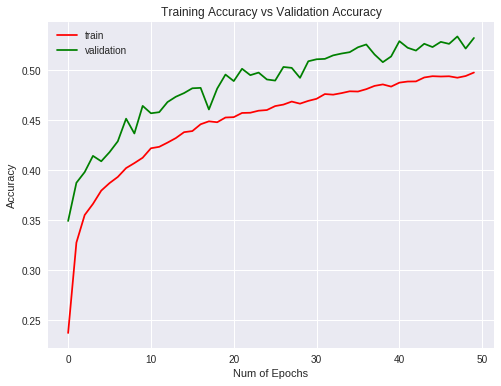

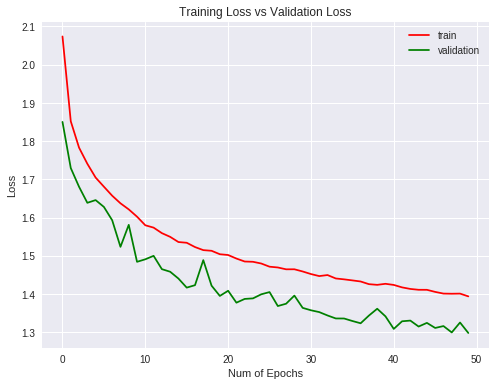

In [17]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
#plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])


plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
#plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])


plt.show()

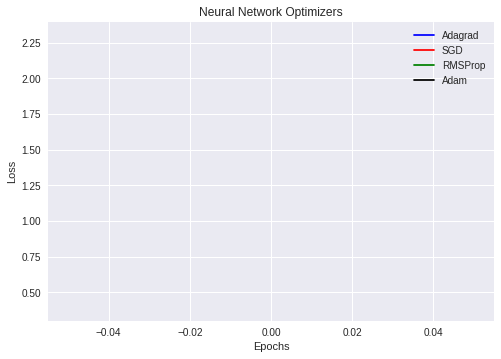

In [40]:
plt.figure()
plt.plot(scores_ad[0], color='blue', label='Adagrad')
plt.plot(scores_s[0], color='red',  label='SGD')
plt.plot(scores_t[0], color='green',  label='RMSProp')
plt.plot(scores_train[0], color='black',  label='Adam')
plt.title("Neural Network Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()